# Unsupervised Learning Techniques

- Clustering
    - Group similar instances into clusters.
    - Applications: Customer segmentation, recommender systems, search engines etc.
- Anomaly detection
    - Find outliers
    - Fraud detection, finding defective items etc.
- Density estimation
    - Task of estimating the probability density function(PDF) of the random process which generates the dataset. 
    - Commonly used for anomaly detection.

## Clustering
- Applications
    - Customer segmentation (recommender systems)
    - Data analysis
    - Dimensionality reduction technique
    - Anomaly detection (Any instance which is far away from the clusters is likely to be an anomaly)
    - Semi-supervised learning (If only a few instances are labeled, then these labels can be propagated to other instances in the cluster)
    - Search engines (clusters of similar images)
    - Image segmentation.

### K-Means (Llyold-Forgy)
- Clustering algo.
- Algo is usually guaranteed to converge in a finite number of steps. Although it may converge to a local optimum.
- Algo:
    - Random centroid initialization.
    - Form the clusters based on how closes the instances are to the centroids.
    - Update the centroids.
    - Recalculate clusters.
- To avoid local optimum: Run algo multiple times with different random initializations and keep the best solution.
- Scikit uses the model's inertia to get the best solution. (*inertia* is the mean squared distance between each instance and its closest centroid)

In [20]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import cv2
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.mixture import GaussianMixture
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit

(-15, 15)

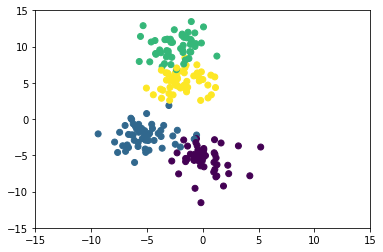

In [51]:
# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)
# create np array for data points
points = data[0]
# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

In [52]:
data[0], data[1]

(array([[-1.06705283e+00,  9.24306355e+00],
        [ 1.08654318e+00, -6.94815805e+00],
        [-2.30970265e+00,  5.84969440e+00],
        [-1.59728965e+00,  8.45369045e+00],
        [-5.79816711e+00, -3.78405528e+00],
        [-2.29833776e+00, -4.66005371e+00],
        [-1.68210799e+00,  1.12843423e+01],
        [-7.38296450e-01, -5.20135260e+00],
        [-1.92048345e-01, -6.45318764e+00],
        [-6.37920287e+00, -2.17672355e+00],
        [-5.12054803e+00, -2.91449176e+00],
        [-4.22297649e+00,  9.04719945e+00],
        [-2.67815731e+00, -2.32828819e+00],
        [-3.02994109e+00,  1.86959382e+00],
        [-5.73938121e+00, -7.25648845e-01],
        [-1.99427571e+00,  4.28616868e+00],
        [-2.89522086e+00,  1.10222354e+01],
        [-1.11286937e+00,  1.03086380e+01],
        [-5.19987051e+00, -1.59879364e+00],
        [-4.75916597e+00, -1.97047767e+00],
        [-6.76865308e+00, -3.56907573e+00],
        [-2.65715781e+00,  3.33763714e+00],
        [-4.61722463e+00,  1.063

In [53]:
k = 4
kmeans = KMeans(n_clusters=k)

In [54]:
y_pred=kmeans.fit_predict(data[0])
y_pred

array([2, 1, 0, 2, 3, 1, 2, 1, 1, 3, 3, 2, 3, 0, 3, 0, 2, 2, 3, 3, 3, 0,
       2, 2, 2, 0, 2, 1, 0, 2, 2, 3, 3, 1, 1, 3, 3, 3, 0, 0, 2, 3, 0, 0,
       1, 1, 2, 0, 0, 2, 1, 3, 0, 2, 0, 0, 1, 3, 3, 0, 1, 1, 2, 1, 1, 2,
       1, 0, 2, 2, 1, 3, 2, 1, 0, 0, 3, 0, 0, 1, 3, 0, 3, 3, 3, 3, 2, 1,
       2, 3, 1, 2, 1, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 2, 0, 1, 0, 1, 3, 2,
       1, 3, 2, 2, 3, 0, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0, 1, 3, 1,
       1, 0, 2, 0, 1, 2, 2, 3, 2, 0, 0, 1, 3, 2, 1, 0, 1, 3, 2, 3, 0, 1,
       1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 3, 3, 3, 0, 1, 1, 1, 1, 3, 0, 1, 0,
       3, 1, 2, 0, 1, 0, 0, 2, 3, 1, 3, 2, 0, 1, 0, 0, 3, 0, 1, 2, 3, 0,
       3, 2])

In [55]:
kmeans.cluster_centers_

array([[-1.92101646,  5.21673484],
       [ 0.05161133, -5.35489826],
       [-2.40167949, 10.17352695],
       [-5.56465793, -2.34988939]])

In [56]:
#Predict cluster for a new point
X_new = np.array([[-6, -3]])
kmeans.predict(X_new)

array([3])

In [71]:
data[0]

array([[-1.06705283e+00,  9.24306355e+00],
       [ 1.08654318e+00, -6.94815805e+00],
       [-2.30970265e+00,  5.84969440e+00],
       [-1.59728965e+00,  8.45369045e+00],
       [-5.79816711e+00, -3.78405528e+00],
       [-2.29833776e+00, -4.66005371e+00],
       [-1.68210799e+00,  1.12843423e+01],
       [-7.38296450e-01, -5.20135260e+00],
       [-1.92048345e-01, -6.45318764e+00],
       [-6.37920287e+00, -2.17672355e+00],
       [-5.12054803e+00, -2.91449176e+00],
       [-4.22297649e+00,  9.04719945e+00],
       [-2.67815731e+00, -2.32828819e+00],
       [-3.02994109e+00,  1.86959382e+00],
       [-5.73938121e+00, -7.25648845e-01],
       [-1.99427571e+00,  4.28616868e+00],
       [-2.89522086e+00,  1.10222354e+01],
       [-1.11286937e+00,  1.03086380e+01],
       [-5.19987051e+00, -1.59879364e+00],
       [-4.75916597e+00, -1.97047767e+00],
       [-6.76865308e+00, -3.56907573e+00],
       [-2.65715781e+00,  3.33763714e+00],
       [-4.61722463e+00,  1.06373187e+01],
       [-1.

#### Voronoi tesselation
- Given a set P := {p1, ..., pn} of sites, a Voronoi Tessellation is a subdivision of the space into n cells, one for each site in P, with the property that a point q lies in the cell corresponding to a site pi iff d(pi, q) < d(pj, q) for i distinct from j.

- [For more info](https://philogb.github.io/blog/2010/02/12/voronoi-tessellation/#:~:text=What%20is%20a%20Voronoi%20Tessellation,for%20i%20distinct%20from%20j.)

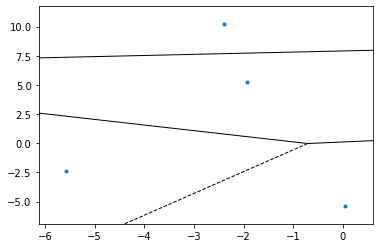

In [75]:
points = kmeans.cluster_centers_
vor = Voronoi(points)
fig = voronoi_plot_2d(vor, show_vertices = False)
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        #plt.fill(*zip(*polygon))
plt.show()

In [76]:
kmeans.inertia_

916.3952117958332

In [77]:
kmeans.score(data[0])
# Predictor's score() must respect 'greater than better' rule. If predictor is better than another, it's score() should return a better score.

-916.395211795833

### K-Means++
- Has a smarter initialization step that tends to select centroids that are distant from each other.
    - This makes KMeans less likely to converge to a suboptimal solution.
- Centroid initialization algo:
    - Choose $c^{(1)}$ at random from the dataset.
    - Pick another centroid $c^{(i)}$ (basically an instance $x^{(1)}$) with probability which is max for the farthest instance from the closest centroid. D($x^{(i)}$) is the distance. This ensures that the instances farther away from already chose centroids are much more likely be selected as centroids.
- Repeat this till all k centroids are chosen.

### Accelerated K-Means and mini-batch K-Means
- Use mini-batches instead of the full dataset for K-Means.
- Makes it possible to cluster huge datasets which do not fit in memory.
- While MB-K-Means is much faster than regular K-Means, it's inertia is generally worse than regular K-Means. 

In [84]:
minibatch_km = MiniBatchKMeans(n_clusters=4)
minibatch_km.fit(data[0])

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=4, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [85]:
minibatch_km.cluster_centers_

array([[-5.58953566, -2.34769183],
       [-2.42349084, 10.07989451],
       [ 0.02727248, -5.40149129],
       [-1.91929976,  5.13858354]])

In [89]:
kmeans.predict([[-5, 0]])

array([3])

In [90]:
minibatch_km.predict([[-5,0]])

array([0])

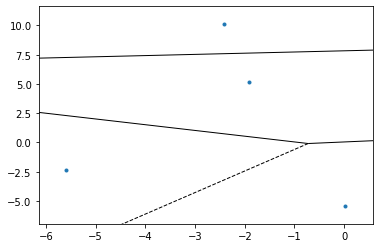

In [88]:
points = minibatch_km.cluster_centers_
vor = Voronoi(points)
fig = voronoi_plot_2d(vor, show_vertices = False)
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        #plt.fill(*zip(*polygon))
plt.show()

### Finding the optimal number of clusters
- Inertia is not a good performance metric to estimate the number of clusters, because it lowers as we increase k.
- The elbow curve.
    - Inertia drops very quickly as we increase the value of K to a certain point but past that it decreases slowly. This point would be a good estimate for K.
- Silhouette score
    - Mean silhouette coeff over all the instances
    - **(b-a)/max(a,b)**
        - b: mean intra-cluster distance
        - a: mean inter-cluster distance
    - range of values: -1 <= score <= 1 
        - A score close to -1 indicates that the instance has been assigned to the wrong cluster
        - A score close to 0 indicates that the instance is close to the cluster boundary.
        - A score close to 1 indicates that the instance is well inside it's own cluster and far from other clusters.

In [93]:
kmeans.labels_

array([2, 1, 0, 2, 3, 1, 2, 1, 1, 3, 3, 2, 3, 0, 3, 0, 2, 2, 3, 3, 3, 0,
       2, 2, 2, 0, 2, 1, 0, 2, 2, 3, 3, 1, 1, 3, 3, 3, 0, 0, 2, 3, 0, 0,
       1, 1, 2, 0, 0, 2, 1, 3, 0, 2, 0, 0, 1, 3, 3, 0, 1, 1, 2, 1, 1, 2,
       1, 0, 2, 2, 1, 3, 2, 1, 0, 0, 3, 0, 0, 1, 3, 0, 3, 3, 3, 3, 2, 1,
       2, 3, 1, 2, 1, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 2, 0, 1, 0, 1, 3, 2,
       1, 3, 2, 2, 3, 0, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0, 1, 3, 1,
       1, 0, 2, 0, 1, 2, 2, 3, 2, 0, 0, 1, 3, 2, 1, 0, 1, 3, 2, 3, 0, 1,
       1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 3, 3, 3, 0, 1, 1, 1, 1, 3, 0, 1, 0,
       3, 1, 2, 0, 1, 0, 0, 2, 3, 1, 3, 2, 0, 1, 0, 0, 3, 0, 1, 2, 3, 0,
       3, 2])

In [94]:
silhouette_score(data[0], kmeans.labels_)

0.5280677534400237

In [95]:
minibatch_km.labels_

array([1, 2, 3, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 3, 0, 3, 1, 1, 0, 0, 0, 3,
       1, 1, 1, 3, 1, 2, 3, 1, 1, 0, 0, 2, 2, 0, 0, 0, 3, 3, 1, 0, 3, 3,
       2, 2, 1, 3, 3, 1, 2, 0, 3, 1, 3, 3, 2, 0, 0, 3, 2, 2, 1, 2, 2, 1,
       2, 3, 1, 1, 2, 0, 1, 2, 3, 3, 0, 3, 3, 2, 0, 3, 0, 0, 0, 0, 1, 2,
       1, 0, 2, 1, 2, 3, 3, 0, 2, 3, 2, 3, 0, 2, 3, 1, 3, 2, 3, 2, 0, 1,
       2, 0, 1, 1, 0, 3, 1, 1, 3, 2, 1, 3, 1, 1, 2, 1, 1, 3, 3, 2, 0, 2,
       2, 3, 1, 3, 2, 1, 1, 0, 1, 3, 3, 2, 0, 1, 2, 3, 2, 0, 1, 0, 3, 2,
       2, 3, 1, 2, 2, 2, 3, 3, 2, 2, 0, 0, 0, 3, 2, 2, 2, 2, 0, 3, 2, 3,
       0, 2, 1, 3, 2, 3, 3, 1, 0, 2, 0, 1, 3, 2, 3, 3, 0, 3, 2, 1, 0, 3,
       0, 1])

In [96]:
silhouette_score(data[0], minibatch_km.labels_)

0.5280677534400237

In [100]:
## Running K-Means for multiple clusters values:
kmeans_per_cluster = list()
for i in range(1,8):
    print('Cluster: '+str(i))
    kmeans_per_cluster.append(KMeans(n_clusters=i, random_state=42).fit(data[0]))

Cluster: 1
Cluster: 2
Cluster: 3
Cluster: 4
Cluster: 5
Cluster: 6
Cluster: 7


In [103]:
silhouette_scores = [silhouette_score(data[0], model.labels_)
                     for model in kmeans_per_cluster[1:]]

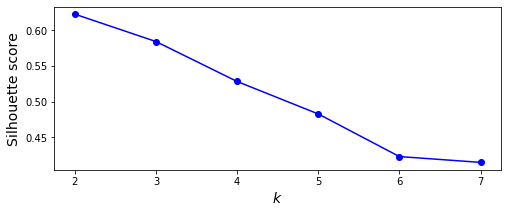

In [109]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 8), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

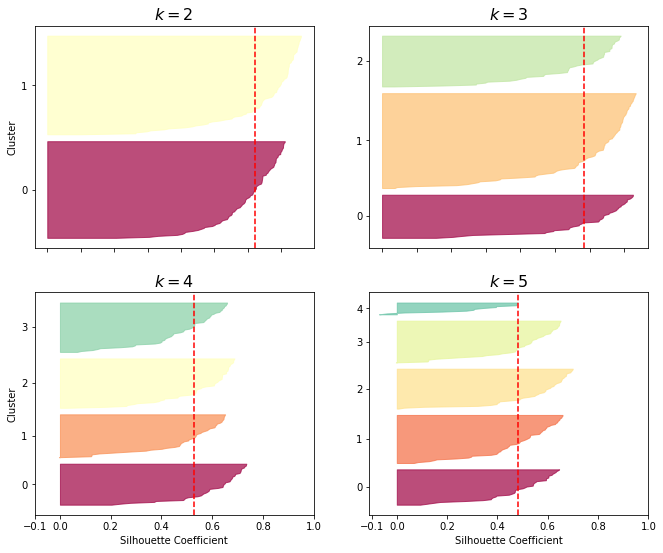

In [115]:
plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    
    y_pred = kmeans_per_cluster[k - 1].labels_
    silhouette_coefficients = silhouette_samples(data[0], y_pred)

    padding = len(data[0]) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4):
        plt.ylabel("Cluster")
    
    if k in (4, 5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

### K-Means limitations
- Have to run the algo several times to avoid suboptimal solutions.
- Have to specify the number of clusters.

### Using Clustering for Image Segmentation
- Image segmentation is the process of partitioning a digital image into multiple distinct regions containing each pixel(sets of pixels, also known as superpixels) with similar attributes.
- Semantic-based, instance-based, color-based.

In [126]:
og_img = cv2.imread("./detect.jpeg")

In [134]:
cv2.imshow(winname='Image', mat=og_img)
cv2.waitKey()

-1

In [129]:
img=cv2.cvtColor(og_img,cv2.COLOR_BGR2RGB)

In [131]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [132]:
print(pixel_values.shape)

(573125, 3)


In [133]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [145]:
# number of clusters (K)
k = 2
_, labels2, (centers2) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

k = 3
_, labels3, (centers3) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

k = 4
_, labels4, (centers4) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

k = 5
_, labels5, (centers5) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [146]:
def create_image(labels, centers):
    # convert back to 8 bit values
    centers = np.uint8(centers)
    # flatten the labels array
    labels = labels.flatten()
    # convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]
    # reshape back to the original image dimension
    segmented_image = segmented_image.reshape(img.shape)
    # show the image
    plt.imshow(segmented_image)
    plt.show()

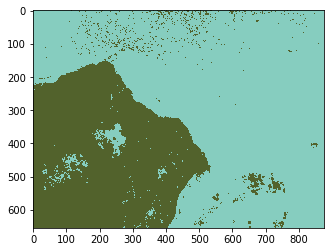

In [147]:
create_image(labels2, centers2)

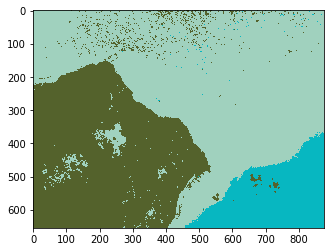

In [148]:
create_image(labels3, centers3)

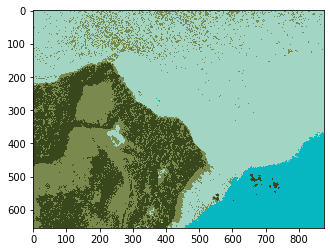

In [149]:
create_image(labels4, centers4)

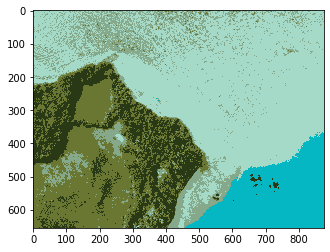

In [150]:
create_image(labels5, centers5)

### Using Clustering for Preprocessing

In [152]:
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

#### Without Preprocessing

In [154]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\aiyer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
log_reg.score(X_test, y_test)

0.9666666666666667

#### Using K-Means for preprocessing

In [168]:
pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50, random_state=42)),
    ('log_reg', LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
])
parameters = {
    'kmeans__n_clusters':range(2,100)
}
grid_clf = GridSearchCV(pipeline, parameters, cv=3, verbose=2, n_jobs=-1)

In [169]:
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed:  3.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                      

In [170]:
grid_clf.best_params_

{'kmeans__n_clusters': 85}

In [171]:
grid_clf.score(X_test, y_test)

0.9755555555555555

### Active Learning
- Expert interacts with the learning algorithm, providing labels for specific instances when the algorithm requests them.
- Uncertainity sampling:
    - Train the model on the labeled instances and then use this model to predict the unlabeled instances.
    - Instances on which the model is the most uncertain(lowest estimated probability) is given to the expert to be labeled.
    - Iterate till performance improvement is neglible in comparison to the labeling effort. 

### DBSCAN
- Density-based spatial clustering of applications with noise
- $\varepsilon$ (Epsilon) neigborhood is established.
- For each instance, algo counts the number of instances which are within $\varepsilon$ distance from that instance. This region is called the instance's $\varepsilon$- neighborhood.
- If the instance has atleast a min no of samples within the neighborhood then this instance becomes a core instance. Core instances are located in dense regions.
- All instances in the neighborhood of a core instance belong to the same cluster
- Anomalies don't lie in such clusters and are not core instances.
- This algo is robust to outliers and has only 2 hyperparams ($\varepsilon$ and min_samples).
- O(m log m) complexity.

In [2]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5) #epsilon neighborhood and min_samples specified
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [4]:
dbscan.labels_ #-1 label is treated as anomaly by algo.

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
        2,  2,  4,  0,  5,  1,  0,  5,  5,  3,  2,  2,  2,  4,  5,  0,  6,
        1, -1,  0,  0,  2,  3, -1,  3,  4, -1,  4,  4,  2,  0,  6,  2,  0,
        2,  4,  0,  3,  3,  0,  3,  5,  2, -1,  3,  0,  5,  0,  0,  0,  2,
        3,  0,  3,  6,  0,  2,  4,  4,  0,  3,  0,  4,  0,  3, -1,  3,  4,
        0, -1,  2,  2,  4,  1,  6,  0,  5,  2,  6,  2,  3,  3, -1,  2, -1,
        2,  4,  0,  0,  0,  2,  5,  2,  0,  2, -1,  2,  3,  1,  5,  2,  0,
        4,  2,  1,  2,  4,  4,  0,  0,  6,  2,  2,  0,  2, -1,  2,  0,  3,
        3,  5, -1,  3,  3,  5,  2,  4,  2,  2,  2,  4,  2,  4,  0, -1,  2,
        1,  2,  6,  4,  2,  3,  2, -1,  2,  0,  0,  2,  0,  4,  0,  4,  4,
        1,  6,  3,  2,  6,  1,  4,  4,  2,  0,  6,  0,  1,  0,  2,  5,  1,
        1,  2,  2,  2,  2,  0,  5,  5,  1,  4,  5,  0,  3,  3,  0,  0,  0,
        2,  0,  5,  2, -1,  2,  3,  5,  2,  2,  0,  4,  0,  4,  2,  2,  4,
        2,  2,  3,  2,  3

In [7]:
print(len(dbscan.core_sample_indices_))
print(dbscan.components_)

808
[[-0.02137124  0.40618608]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]
 ...
 [ 1.66258462 -0.3079193 ]
 [-0.94355873  0.3278936 ]
 [ 0.79419406  0.60777171]]


In [8]:
dbscan_new = DBSCAN(eps=0.2, min_samples=5) #epsilon neighborhood and min_samples specified
dbscan_new.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [12]:
# Visualization from Geron's jupyter notebook.
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

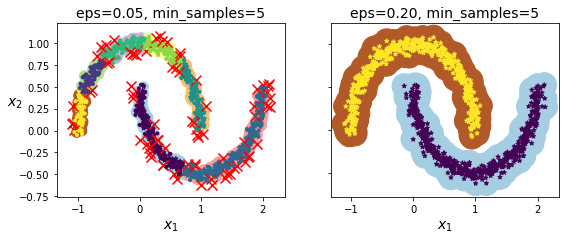

In [13]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan_new, X, size=600, show_ylabels=False)

plt.show()

## Other Clustering Algos

### Agglomerative Clustering:
- Built from bottom up
- At each iteration, it connects the nearest pair of clusters (starts from the individual instances).
- Scales well to a large number of instances/clusters.
- Produces a flexible cluster tree

### BIRCH
- Balanced Iterative reducing and clustering using hierarchies
- Designed to handle large datasets
- Faster than batch K-Means as long as number of features is not too large
- Uses limited memory while handling datasets as:
    - During training, it builds a tree structure containing just enough info to quickly assign each new instance to a cluster

### Mean-Shift
- Centers a circle on the instances
- Calculates the mean of all the instances within the circle and shifts the circle so that it is centered on the mean
- Every iteration it recalculates the mean, until all the circles stop moving
    - It will stop moving only when it reaches a highly dense area.
    - Similar to DBSCAN
        - Can detect any number of clusters of any shape
        - Very few hyperparameters
    - Differs from DBSCAN
        - Mean-Shift chops clusters into pieces when they have internal density variations
- Computational complexity: O($m^{(2)}$) therefore not suited for large datasets

### Affinity propagation
- Uses a voting system.
- Instances vote for similar instances to be their representatives.
- Once the algo converges, each representative and its voters form a cluster.
- Computational complexity: O($m^{(2)}$) therefore not suited for large datasets.

### Spectral Clustering
- Algo takes a similarity matrix between instances and creates a low-dimensional embedding from it (i.e reduces its dimensionality).
- Then it uses another clustering algo in this low dimensional space.
- Can be used to capture complex clusters and cut graphs(ex: identify cluster of friends on social networks).
- Does not scale well to large number of instances and with clusters of different sizes.

## Gaussian Mixtures
- Gaussian Mixture model is a probabilistic model which assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown.
- Clusters which contain such instances usually look like ellipsoids

In [4]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
Y = np.r_[y1, y2]

In [5]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [6]:
gm.weights_

array([0.39032584, 0.20961444, 0.40005972])

In [7]:
gm.means_

array([[ 0.05145113,  0.07534576],
       [ 3.39947665,  1.05931088],
       [-1.40764129,  1.42712848]])

In [8]:
gm.covariances_

array([[[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]]])

#### Expectation-Maximization
- Initialize cluster parameters randomly
- Repeat until convergence:
    - Assign instances to clusters (Expectation step)
    - Updating the clusters (Maximization step)
- Similar to K-Means. Other than finding the cluster (i.e all the means(mu)) it also finds their size, shape and orientation(all the sigma(Covariance matrices))
- Unlike K-means,
    - EM uses soft cluster assignments, not hard assignments.
    - During the expectation step, for each instance the algo estimates the probability that it belongs to each cluster.
    - In the maximization step, cluster assignment takes place with every instance being weighted that it belongs to that cluster.
    - These probabilities are a.k.a Responsibilities of the clusters for the instances.
    

## Exercises
10. Train a model to predict which person is represented in each picture (Olivetti dataset)

In [10]:
X, y = fetch_olivetti_faces(shuffle=True, random_state=42, return_X_y=True)
print(X.shape, y.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\aiyer\scikit_learn_data
(400, 4096) (400,)


In [12]:
def train_val_test_split(X,y):
    strat_split = StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.15)
    for trval_index, test_index in strat_split.split(X,y):
        X_trval, X_test = X[trval_index], X[test_index]
        y_trval, y_test = y[trval_index], y[test_index]
    for train_index, val_index in strat_split.split(X_trval, y_trval):
        X_train, X_val = X_trval[train_index], X_trval[val_index]
        y_train, y_val = y_trval[train_index], y_trval[val_index]
    return X_trval, X_train, X_val, X_test, y_trval, y_train, y_val, y_test

In [16]:
X_trval, X_train, X_val, X_test, y_trval, y_train, y_val, y_test = train_val_test_split(X,y)

In [17]:
X_train.shape, X_val.shape, X_test.shape

((289, 4096), (51, 4096), (60, 4096))

In [23]:
X_train

array([[0.5123967 , 0.56198347, 0.60330576, ..., 0.0785124 , 0.08677686,
        0.11157025],
       [0.35123968, 0.4338843 , 0.553719  , ..., 0.1570248 , 0.2107438 ,
        0.20661157],
       [0.5       , 0.5123967 , 0.5289256 , ..., 0.6446281 , 0.6322314 ,
        0.59917355],
       ...,
       [0.48347107, 0.446281  , 0.46280992, ..., 0.661157  , 0.6735537 ,
        0.6694215 ],
       [0.20661157, 0.2107438 , 0.3429752 , ..., 0.57024795, 0.6735537 ,
        0.7107438 ],
       [0.42975205, 0.4752066 , 0.5206612 , ..., 0.3553719 , 0.39256197,
        0.37603307]], dtype=float32)

In [45]:
## Running K-Means for multiple clusters values:
kmeans_per_cluster = list()
for i in range(10,165,5):
    print('Cluster: '+str(i))
    kmeans_per_cluster.append(KMeans(n_clusters=i, random_state=42).fit(X_train))

Cluster: 10
Cluster: 15
Cluster: 20
Cluster: 25
Cluster: 30
Cluster: 35
Cluster: 40
Cluster: 45
Cluster: 50
Cluster: 55
Cluster: 60
Cluster: 65
Cluster: 70
Cluster: 75
Cluster: 80
Cluster: 85
Cluster: 90
Cluster: 95
Cluster: 100
Cluster: 105
Cluster: 110
Cluster: 115
Cluster: 120
Cluster: 125
Cluster: 130
Cluster: 135
Cluster: 140
Cluster: 145
Cluster: 150
Cluster: 155
Cluster: 160


In [48]:
silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_cluster]

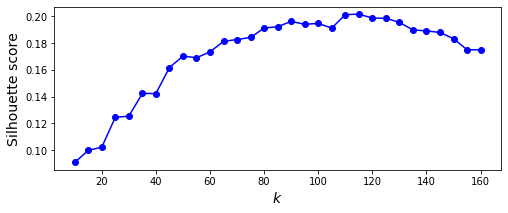

In [49]:
plt.figure(figsize=(8, 3))
plt.plot(range(10, 165, 5), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [50]:
inertias = [model.inertia_ for model in kmeans_per_cluster]
inertias

[13621.777538610733,
 12205.840615690084,
 11418.89703836481,
 10345.805438537658,
 9711.122768235276,
 8957.943035512762,
 8387.02123025809,
 7795.3284560900465,
 7234.583989837698,
 6891.969071229232,
 6456.601638704468,
 6098.589130010763,
 5791.954605187947,
 5413.673981453015,
 5108.143556728599,
 4862.702799374496,
 4572.74585143604,
 4346.6484614278515,
 4096.2053661189375,
 3890.5989963397355,
 3643.4881762969517,
 3426.9719078225976,
 3241.9310874162097,
 3060.039117724363,
 2894.0660128774357,
 2737.0847034422018,
 2565.3718914129854,
 2407.1269094889835,
 2272.857585681281,
 2125.889188188417,
 1989.7958939105304]

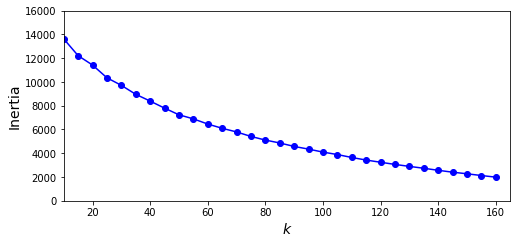

In [52]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(10, 165, 5), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([10,165, 0, 16000])
plt.show()

In [54]:
index = np.argmax(silhouette_scores)
index

21

In [56]:
range_k = range(10,165,5)
optimal_k = range_k[index]
optimal_k

115

In [57]:
best_model = kmeans_per_cluster[index]

Cluster 0


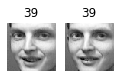

Cluster 1


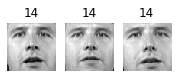

Cluster 2


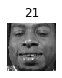

Cluster 3


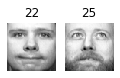

Cluster 4


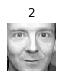

Cluster 5


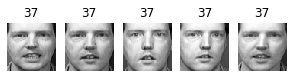

Cluster 6


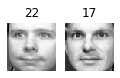

Cluster 7


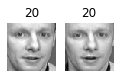

Cluster 8


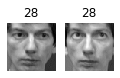

Cluster 9


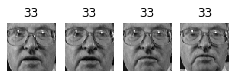

Cluster 10


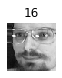

Cluster 11


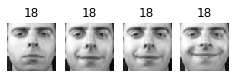

Cluster 12


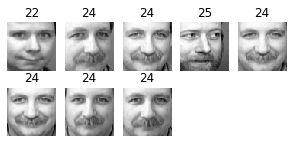

Cluster 13


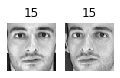

Cluster 14


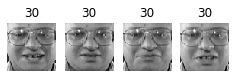

Cluster 15


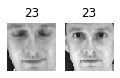

Cluster 16


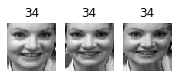

Cluster 17


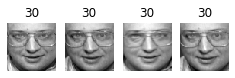

Cluster 18


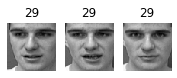

Cluster 19


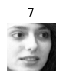

Cluster 20


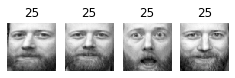

Cluster 21


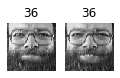

Cluster 22


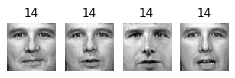

Cluster 23


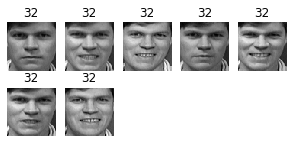

Cluster 24


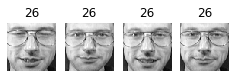

Cluster 25


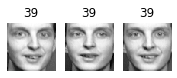

Cluster 26


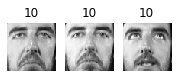

Cluster 27


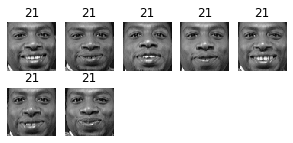

Cluster 28


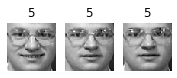

Cluster 29


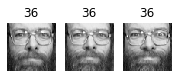

Cluster 30


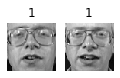

Cluster 31


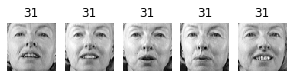

Cluster 32


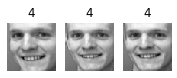

Cluster 33


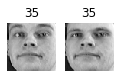

Cluster 34


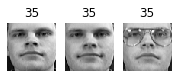

Cluster 35


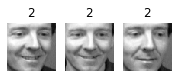

Cluster 36


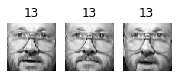

Cluster 37


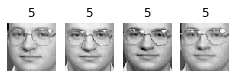

Cluster 38


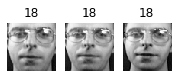

Cluster 39


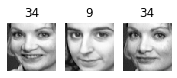

Cluster 40


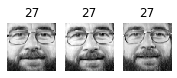

Cluster 41


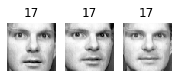

Cluster 42


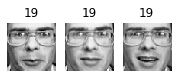

Cluster 43


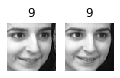

Cluster 44


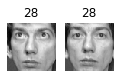

Cluster 45


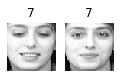

Cluster 46


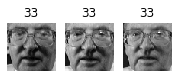

Cluster 47


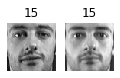

Cluster 48


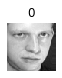

Cluster 49


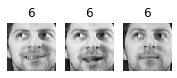

Cluster 50


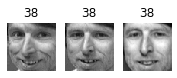

Cluster 51


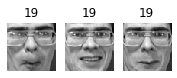

Cluster 52


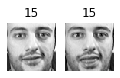

Cluster 53


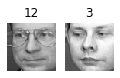

Cluster 54


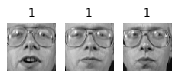

Cluster 55


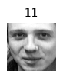

Cluster 56


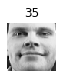

Cluster 57


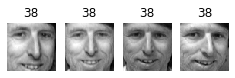

Cluster 58


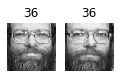

Cluster 59


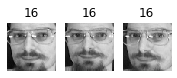

Cluster 60


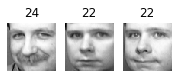

Cluster 61


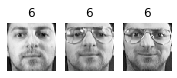

Cluster 62


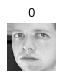

Cluster 63


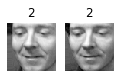

Cluster 64


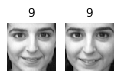

Cluster 65


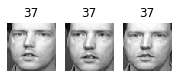

Cluster 66


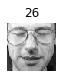

Cluster 67


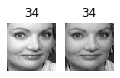

Cluster 68


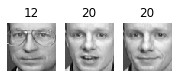

Cluster 69


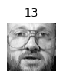

Cluster 70


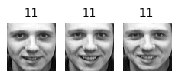

Cluster 71


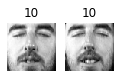

Cluster 72


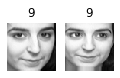

Cluster 73


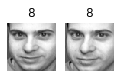

Cluster 74


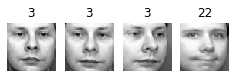

Cluster 75


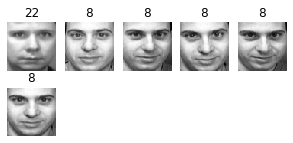

Cluster 76


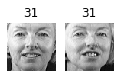

Cluster 77


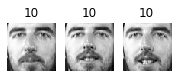

Cluster 78


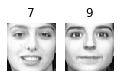

Cluster 79


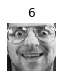

Cluster 80


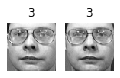

Cluster 81


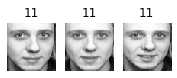

Cluster 82


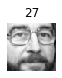

Cluster 83


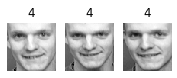

Cluster 84


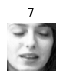

Cluster 85


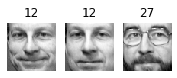

Cluster 86


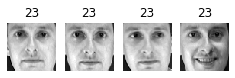

Cluster 87


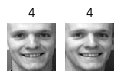

Cluster 88


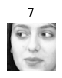

Cluster 89


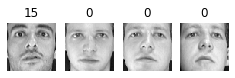

Cluster 90


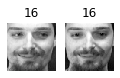

Cluster 91


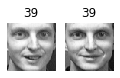

Cluster 92


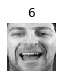

Cluster 93


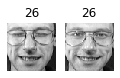

Cluster 94


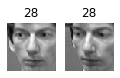

Cluster 95


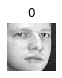

Cluster 96


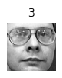

Cluster 97


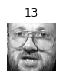

Cluster 98


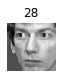

Cluster 99


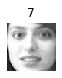

Cluster 100


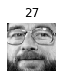

Cluster 101


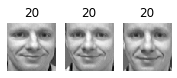

Cluster 102


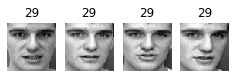

Cluster 103


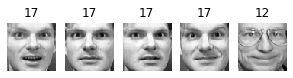

Cluster 104


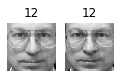

Cluster 105


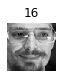

Cluster 106


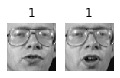

Cluster 107


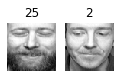

Cluster 108


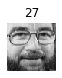

Cluster 109


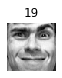

Cluster 110


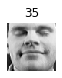

Cluster 111


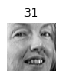

Cluster 112


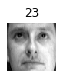

Cluster 113


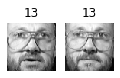

Cluster 114


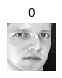

In [58]:
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster].reshape(-1, 64, 64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels)